# Clustering Wine Datset

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
sb.set(rc={'figure.figsize':(11.7,8.27)})

# Importing data

In [27]:
X = pd.read_csv('wine.data.csv')
#Shuffling data
X = X.sample(frac=1)
X.head()

,Region,\tAlcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
44,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
57,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
16,1,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
74,2,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886


# Scaling features

In [28]:
mms = MinMaxScaler()
mms.fit(X)
X=mms.transform(X)
print(X)

[[0.         0.53157895 0.20355731 ... 0.32520325 0.76190476 0.43295292]
 [0.         0.59473684 0.243083   ... 0.4796748  0.57509158 0.70756063]
 [0.         0.86052632 0.23320158 ... 0.4796748  0.50549451 0.7146933 ]
 ...
 [0.5        0.43684211 0.15612648 ... 0.3902439  0.28937729 0.15477889]
 [0.5        0.34210526 0.04940711 ... 0.47154472 0.38095238 0.33666191]
 [0.         0.65263158 0.20948617 ... 0.50406504 0.58608059 0.58273894]]


# Visualising clusters

### Reducing dimensionality

In [29]:
#reducing dimensions using PCA for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)
print(X)
x = X_2D[:,0]
y = X_2D[:,1]

[[0.         0.53157895 0.20355731 ... 0.32520325 0.76190476 0.43295292]
 [0.         0.59473684 0.243083   ... 0.4796748  0.57509158 0.70756063]
 [0.         0.86052632 0.23320158 ... 0.4796748  0.50549451 0.7146933 ]
 ...
 [0.5        0.43684211 0.15612648 ... 0.3902439  0.28937729 0.15477889]
 [0.5        0.34210526 0.04940711 ... 0.47154472 0.38095238 0.33666191]
 [0.         0.65263158 0.20948617 ... 0.50406504 0.58608059 0.58273894]]


 ### Plotting

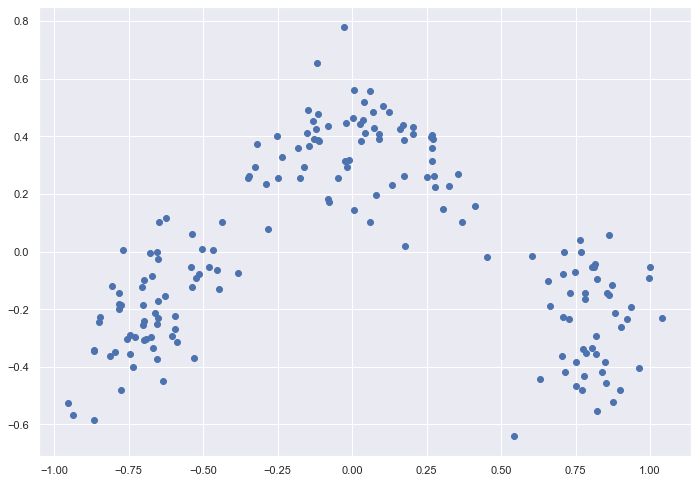

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

Visually there are three clusters, but using the **elbow method** will give a more accurate number of clusters.

# KMeans Elbow method

In [ ]:
ssd = [] #sum of squared distances
K = range(1,11)
for i in K:
    km = KMeans(n_clusters = i)
    km.fit(X)
    km.transform(X)
    ssd.append(km.inertia_)

plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**3** looks like the most optimal number of clusters

# Test and Training split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42, shuffle=False) #already shuffeld at start
#the reason it is not shuffled here is when PCA is being applied to the train and test datasets, it gets scaled
# differently and does not fit the graph properly.

In [22]:
km = KMeans(n_clusters = 3)
km.fit(X_train)
km.transform(X_train)
y_kmeans = km.predict(X_train)
clusterpoints = pca.fit_transform(km.cluster_centers_)
x= pca.fit_transform(X_train)
print(clusterpoints)

[[-0.04255826  0.38217676]
 [ 0.75557728 -0.1744758 ]
 [-0.71301902 -0.20770096]]


<function matplotlib.pyplot.show(close=None, block=None)>

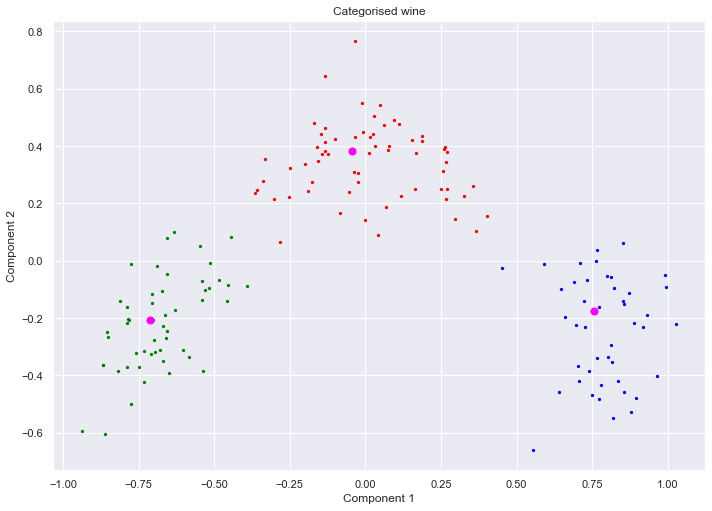

In [23]:
plt.scatter(x[:,0][y_kmeans==0], x[:,1][y_kmeans==0], s=5, c='red', label ='Cluster 1')
plt.scatter(x[:,0][y_kmeans==1], x[:,1][y_kmeans==1], s=5, c='blue', label ='Cluster 2')
plt.scatter(x[:,0][y_kmeans==2], x[:,1][y_kmeans==2], s=5, c='green', label ='Cluster 3')
plt.scatter(clusterpoints[:,0], clusterpoints[:,1], s=50, c='magenta', label = 'Centroids')
plt.title('Categorised wine')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show

# Use?

Now, given a new sample with certain features, we can predict which group it belongs to apply common analysis of its qualities and stuff etc.

In [24]:
# for example, the 10% test data can be used here
y_t = km.predict(X_test)
x_t = pca.fit_transform(X_test) 

<function matplotlib.pyplot.show(close=None, block=None)>

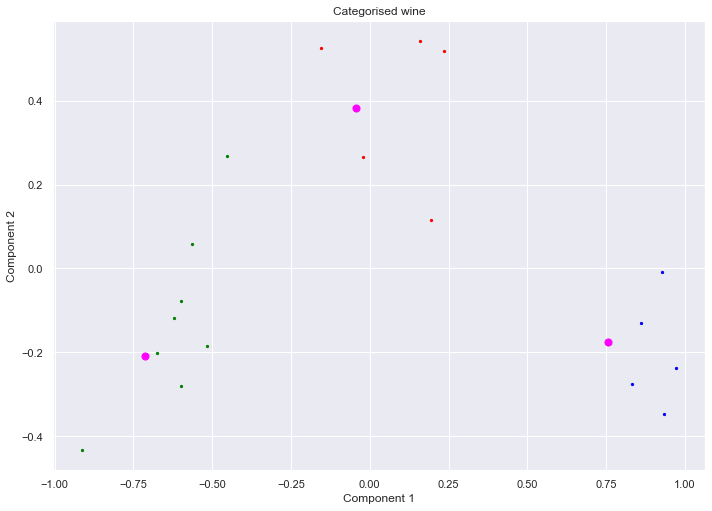

In [25]:
plt.scatter(x_t[:,0][y_t==0], x_t[:,1][y_t==0], s=5, c='red', label ='Cluster 1')
plt.scatter(x_t[:,0][y_t==1], x_t[:,1][y_t==1], s=5, c='blue', label ='Cluster 2')
plt.scatter(x_t[:,0][y_t==2], x_t[:,1][y_t==2], s=5, c='green', label ='Cluster 3')
plt.scatter(clusterpoints[:,0], clusterpoints[:,1], s=50, c='magenta', label = 'Centroids')
plt.title('Categorised wine')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show